In [323]:
import os
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing
import seaborn as sns
import random
from collections import Counter
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
import wittgenstein as lw
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from mlxtend.plotting import plot_decision_regions


from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

In [324]:
S1PATH = os.path.join('..','..','C:/Users/Mahran/Desktop/Year 3/Machine Learning/ML-Assignment1','S1_Dataset')
S2PATH = os.path.join('..','..','C:/Users/Mahran/Desktop/Year 3/Machine Learning/ML-Assignment1','S2_Dataset')
s1 = pd.DataFrame()
for filename in os.listdir(S1PATH):
    if filename != 'README.txt':
        data_path = os.path.join(S1PATH, filename)
        data=pd.read_csv(data_path, header=None)
        s1= s1.append(data, ignore_index=True)
s1.columns = ['time','frontal','vertical','lateral','id','rssi','phase','frequency','activity']
s1.head()

,time,frontal,vertical,lateral,id,rssi,phase,frequency,activity
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1


In [319]:
S1PATH = os.path.join('..','..','C:/Users/Mahran/Desktop/Year 3/Machine Learning/ML-Assignment1','S1_Dataset')
S2PATH = os.path.join('..','..','C:/Users/Mahran/Desktop/Year 3/Machine Learning/ML-Assignment1','S2_Dataset')
s2 = pd.DataFrame()
for filename in os.listdir(S2PATH):
    if filename != 'README.txt':
        data_path = os.path.join(S2PATH, filename)
        data=pd.read_csv(data_path, header=None)
        s2= s2.append(data, ignore_index=True)
s2.columns = ['time','frontal','vertical','lateral','id','rssi','phase','frequency','activity']
s2.head()

,time,frontal,vertical,lateral,id,rssi,phase,frequency,activity
0,0.00,-0.232160,0.215880,-1.18820,2,-48.5,2.74430,920.75,3
1,0.25,-0.056282,0.043636,-1.14260,2,-50.0,2.36540,921.75,3
2,0.50,0.143050,0.296270,-1.33640,3,-59.5,0.20709,922.25,3
3,0.75,0.318930,0.284780,-0.92593,2,-51.0,0.41571,923.25,3
4,1.05,0.412730,0.135500,-1.02860,2,-44.5,4.45470,920.25,3


In [321]:
unique, counts = np.unique(s2['activity'], return_counts=True)
CountOfClasses=dict(zip(unique, counts))
CountOfClasses

{1: 1244, 2: 530, 3: 20537, 4: 335}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


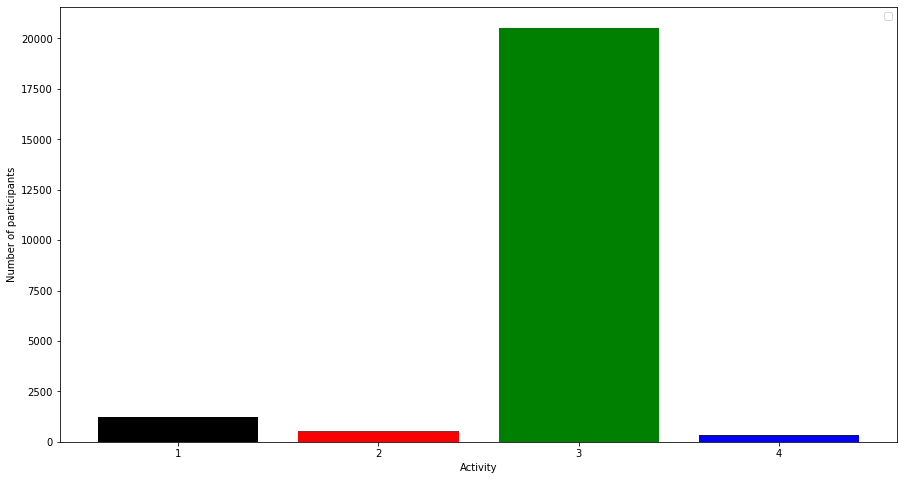

In [322]:
fig = plt.figure(figsize = (15.0,8.0))
ax= fig.add_subplot(111)
plt.bar(*zip(*CountOfClasses.items()),color=['black', 'red', 'green', 'blue'])
plt.xticks([1,2,3,4])
plt.legend()
plt.ylabel("Number of participants")
plt.xlabel("Activity")
plt.show()

# S2

In [320]:
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52482 entries, 0 to 52481
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       52482 non-null  float64
 1   frontal    52482 non-null  float64
 2   vertical   52482 non-null  float64
 3   lateral    52482 non-null  float64
 4   id         52482 non-null  int64  
 5   rssi       52482 non-null  float64
 6   phase      52482 non-null  float64
 7   frequency  52482 non-null  float64
 8   activity   52482 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 3.6 MB


#### Data Set Information:

This dataset contains the motion data of 14 healthy older aged between 66 and 86 years old, performed broadly scripted activities using a batteryless, wearable sensor on top of their clothing at sternum level. Data is sparse and noisy due to the use of a passive sensor.
Participants were allocated in two clinical room settings (S1 and S2). The setting of S1 (Room1) uses 4 RFID reader antennas around the room (one on ceiling level, and 3 on wall level) for the collection of data, whereas the room setting S2 (Room2) uses 3 RFID reader antennas (two at ceiling level and one at wall level) for the collection of motion data.
The activities performed were:
- walking to the chair,
- sitting on the chair,
- getting off the chair,
- walking to bed,
- lying on bed,
- getting off the bed and
- walking to the door.
 ###### Hence the possible class labels assigned for every sensor observation are:
- Sitting on bed
- Sitting on chair
- Lying on bed
- Ambulating, where ambulating includes standing, walking around the room.


#### Attribute Information:

The content of the file is as follows:
Comma separated values (CSV) format.
- Column 1: Time in seconds
- Column 2: Acceleration reading in G for frontal axis
- Column 3: Acceleration reading in G for vertical axis
- Column 4: Acceleration reading in G for lateral axis
- Column 5: Id of antenna reading sensor
- Column 6: Received signal strength indicator (RSSI)
- Column 7: Phase
- Column 8: Frequency
- Column 9: Label of activity, 1: sit on bed, 2: sit on chair, 3: lying, 4: ambulating
In addition, gender of participant is included in the last character of file name eg: d1p33F (F:female).



In [106]:
s1

,time,frontal,vertical,lateral,id,rssi,phase,frequency,activity
0,0.00,0.272030,1.00820,-0.082102,1,-63.5,2.4252,924.25,1
1,0.50,0.272030,1.00820,-0.082102,1,-63.0,4.7369,921.75,1
2,1.50,0.447910,0.91636,-0.013684,1,-63.5,3.0311,923.75,1
3,1.75,0.447910,0.91636,-0.013684,1,-63.0,2.0371,921.25,1
4,2.50,0.342380,0.96229,-0.059296,1,-63.5,5.8920,920.25,1
...,...,...,...,...,...,...,...,...,...
52477,485.00,0.330660,0.95081,-0.230340,1,-57.0,6.2188,921.75,1
52478,485.08,0.330660,0.95081,-0.230340,3,-58.0,0.8805,921.75,1
52479,485.50,0.330660,0.95081,-0.230340,1,-60.5,5.0054,924.75,1
52480,488.25,0.119600,0.82449,0.009122,4,-56.0,4.9087,925.75,4


In [107]:
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52482 entries, 0 to 52481
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       52482 non-null  float64
 1   frontal    52482 non-null  float64
 2   vertical   52482 non-null  float64
 3   lateral    52482 non-null  float64
 4   id         52482 non-null  int64  
 5   rssi       52482 non-null  float64
 6   phase      52482 non-null  float64
 7   frequency  52482 non-null  float64
 8   activity   52482 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 3.6 MB


In [108]:
s1.shape

(52482, 9)

In [109]:
s1.isna().sum()

time         0
frontal      0
vertical     0
lateral      0
id           0
rssi         0
phase        0
frequency    0
activity     0
dtype: int64

In [110]:
s1

,time,frontal,vertical,lateral,id,rssi,phase,frequency,activity
0,0.00,0.272030,1.00820,-0.082102,1,-63.5,2.4252,924.25,1
1,0.50,0.272030,1.00820,-0.082102,1,-63.0,4.7369,921.75,1
2,1.50,0.447910,0.91636,-0.013684,1,-63.5,3.0311,923.75,1
3,1.75,0.447910,0.91636,-0.013684,1,-63.0,2.0371,921.25,1
4,2.50,0.342380,0.96229,-0.059296,1,-63.5,5.8920,920.25,1
...,...,...,...,...,...,...,...,...,...
52477,485.00,0.330660,0.95081,-0.230340,1,-57.0,6.2188,921.75,1
52478,485.08,0.330660,0.95081,-0.230340,3,-58.0,0.8805,921.75,1
52479,485.50,0.330660,0.95081,-0.230340,1,-60.5,5.0054,924.75,1
52480,488.25,0.119600,0.82449,0.009122,4,-56.0,4.9087,925.75,4



# Checking the dataset for imbalances

In [94]:
unique, counts = np.unique(s1['activity'], return_counts=True)
CountOfClasses=dict(zip(unique, counts))
CountOfClasses

{1: 15162, 2: 4381, 3: 30983, 4: 1956}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


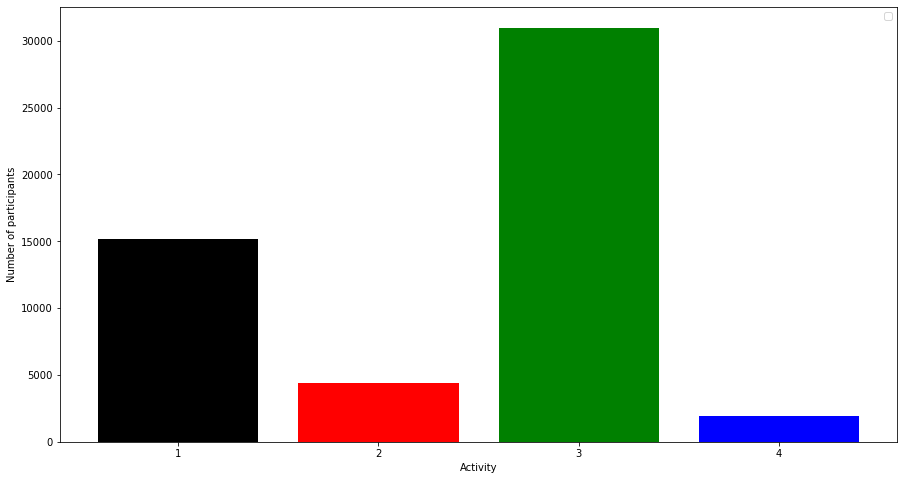

In [96]:
fig = plt.figure(figsize = (15.0,8.0))
ax= fig.add_subplot(111)
plt.bar(*zip(*CountOfClasses.items()),color=['black', 'red', 'green', 'blue'])
plt.xticks([1,2,3,4])
plt.legend()
plt.ylabel("Number of participants")
plt.xlabel("Activity")
plt.show()

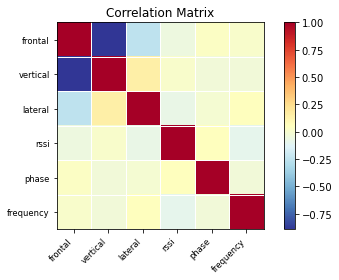

In [71]:
correlarion= s1.corr()
sm.graphics.plot_corr(correlarion, xnames=list(correlarion.columns))
plt.show()

# The relationship between activities and the features are low

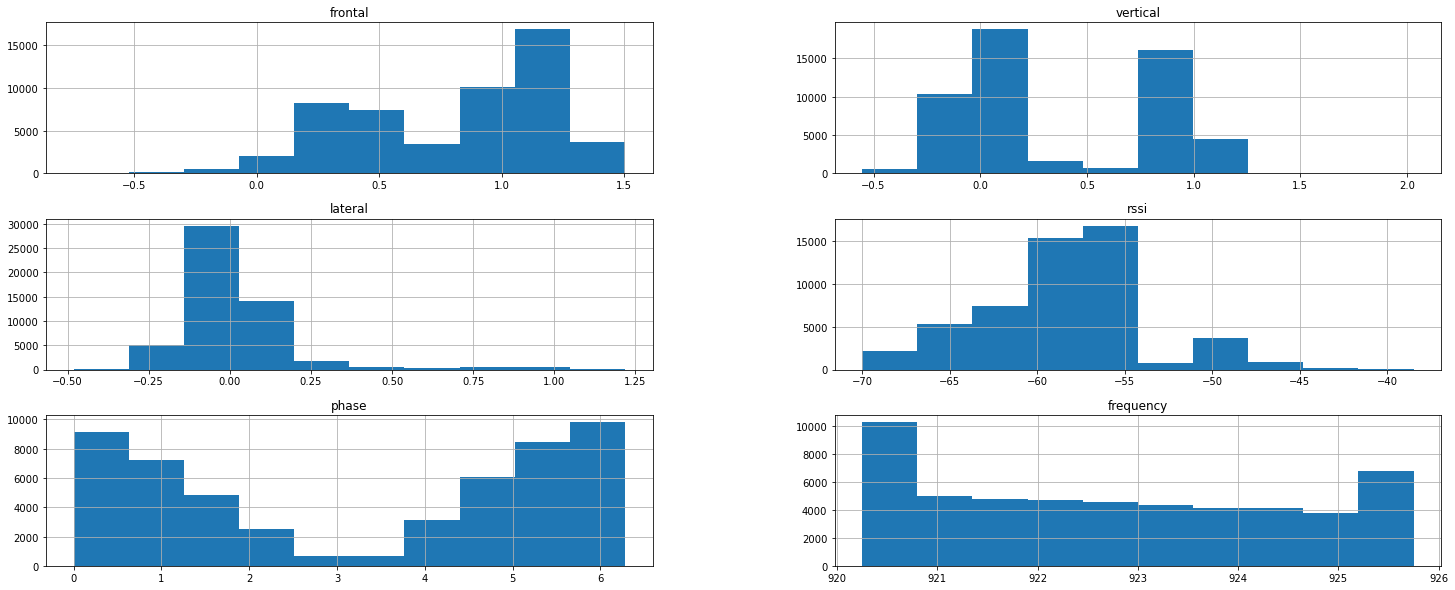

In [72]:
s1.hist(figsize=(25, 10))
plt.show()

# data doesn't have so many outliers but it does in the lateral,vertical ,and frontal accelaration and in the RSSI

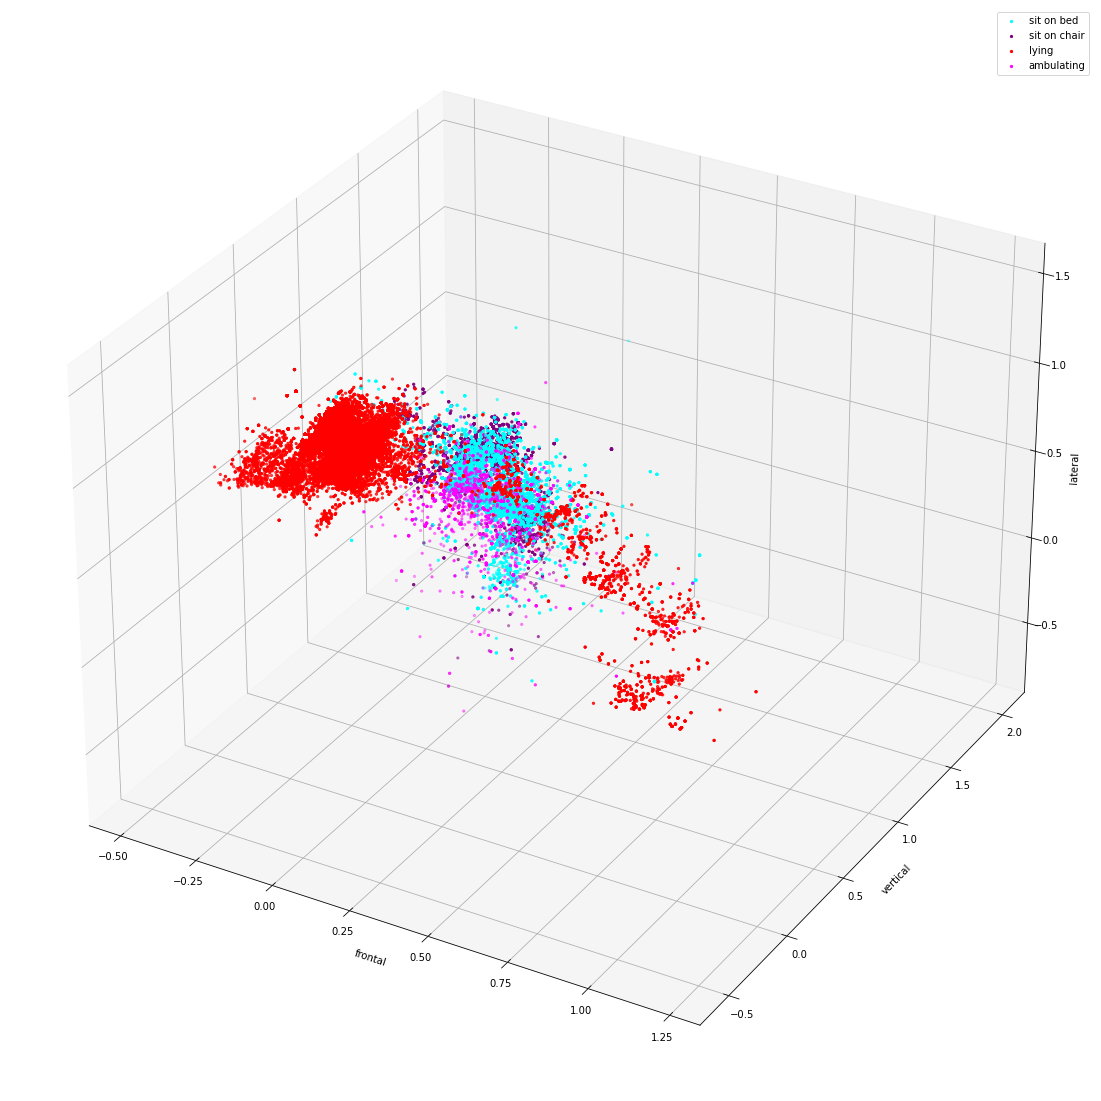

In [97]:
fig = plt.figure(figsize = (20.0,20.0))
ax= fig.add_subplot(111,projection ='3d')

#Column 9: Label of activity, 1: sit on bed, 2: sit on chair, 3: lying, 4: ambulating

cond = [(1,'#00FFFF', 'sit on bed'),(2,'#800080','sit on chair'),(3,'#FF0000', 'lying'),(4,'#FF00FF', 'ambulating')]

for x,color,action in cond:
    xs = s1.loc[s1["activity"] == x]['lateral']
    ys = s1.loc[s1['activity'] == x]['vertical']
    zs = s1.loc[s1['activity'] == x]['frontal']
    ax.scatter(xs, ys, zs, c=color, marker='.', label=action)

ax.legend()
ax.set_xlabel('frontal')
ax.set_ylabel('vertical')
ax.set_zlabel('lateral')


plt.show()

# the plot above shows the whole range of time needed for each activity to preform , ambulation here is the activity that has more variety of time 

# Split the dataset for training

In [304]:
x = s1.iloc[:,:8]
y = s1.iloc[:,8:9]

In [305]:
x

,time,frontal,vertical,lateral,id,rssi,phase,frequency
0,0.00,0.272030,1.00820,-0.082102,1,-63.5,2.4252,924.25
1,0.50,0.272030,1.00820,-0.082102,1,-63.0,4.7369,921.75
2,1.50,0.447910,0.91636,-0.013684,1,-63.5,3.0311,923.75
3,1.75,0.447910,0.91636,-0.013684,1,-63.0,2.0371,921.25
4,2.50,0.342380,0.96229,-0.059296,1,-63.5,5.8920,920.25
...,...,...,...,...,...,...,...,...
52477,485.00,0.330660,0.95081,-0.230340,1,-57.0,6.2188,921.75
52478,485.08,0.330660,0.95081,-0.230340,3,-58.0,0.8805,921.75
52479,485.50,0.330660,0.95081,-0.230340,1,-60.5,5.0054,924.75
52480,488.25,0.119600,0.82449,0.009122,4,-56.0,4.9087,925.75


Secondly, the class imbalance problem is not really due to the imbalance itself, but because there are too few patterns belonging to the minority class to adequately describe it's distribution. Most classifiers work fine with imbalanced data provided you have a lot of data. Attempts to balance the dataset can make things worse rather than better by over-correcting for the bias due to class imbalance.

So if you have a performance problem due to class imbalance, it means you don't have enough data to adequately estimate the model parameters, in which case the last thing you should do is to perform feature selection as the added degrees of freedom this adds to the problem will only make the estimation problem worse. Regularisation is likely to be a much better solution as it adds essentially one continuous degree of freedom, and will be much less susceptible to over-fitting.

# Selecting features using Step Forward Feature Selection (SFS) technique

In [325]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=42)

In [263]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

efs = EFS(KNeighborsClassifier(n_neighbors=4),
         min_features= 4,
          max_features= 6,
          scoring='accuracy',
          cv = None,
          n_jobs=-1
         ).fit(X_train, y_train)

Features: 154/154

In [264]:
df = pd.DataFrame.from_dict(efs.get_metric_dict()).T
df = df[["feature_idx","avg_score"]]
df

,feature_idx,avg_score
0,"(0, 1, 2, 3)",0.948966
1,"(0, 1, 2, 4)",0.977865
2,"(0, 1, 2, 5)",0.942075
3,"(0, 1, 2, 6)",0.942011
4,"(0, 1, 2, 7)",0.940392
...,...,...
149,"(1, 2, 3, 4, 6, 7)",0.980533
150,"(1, 2, 3, 5, 6, 7)",0.960431
151,"(1, 2, 4, 5, 6, 7)",0.985963
152,"(1, 3, 4, 5, 6, 7)",0.976659


In [265]:
efs.best_score_

0.9894248785290102

In [266]:
efs.best_feature_names_

('frontal', 'vertical', 'lateral', 'id', 'rssi')

In [267]:
efs.best_idx_

(1, 2, 3, 4, 5)

In [314]:
X_train=X_train.iloc[:,1:4]
X_test=X_test.iloc[:,1:4]

In [317]:
X_train

,frontal,vertical,lateral
21656,1.374200,-0.117130,-0.025087
46028,0.447910,0.927840,-0.002281
12531,-0.079733,0.950810,0.123150
10152,0.342380,0.881910,0.362620
45605,0.436190,0.927840,-0.036490
...,...,...,...
11284,0.940380,-0.036746,-0.013684
44732,1.139700,0.020670,-0.070699
38158,0.342380,0.973770,-0.059296
860,1.081100,-0.231960,-0.196130


# We will use this feature sellection method as it outputed more relevant features , i.e.,. previous methods eleminated `lateral` feature as it has negative values



# Scaling features 

The reason for using `StandardScaler` and not `MinMaxScaler` is that `MinMaxScaler` is more affected by outliers

In [130]:
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
X_test= stand.fit_transform(X_test)

# Modelling

## We will try 3 different models
- Descion tree classifier 
- Logistic Regression
- K-nearest neighbor

In [326]:
def modelfit(X,y,model):
    if model == 'DT':
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=42)
        #selecting the importatnt features for DT
        X_train=X_train.iloc[:,1:4]
        X_test=X_test.iloc[:,1:4]
        #scalin features
        #stand = preprocessing.StandardScaler()
        #X_train = stand.fit_transform(X_train)
        #X_test= stand.fit_transform(X_test)
        for i in range (2 , 11):

            treecf = DecisionTreeClassifier(max_depth=i)

            treecf.fit(X_train,y_train)

            y_pred = treecf.predict(X_test)
    
            acc_train = treecf.score(X_train,y_train)
            acc_test = treecf.score(X_test, y_test)
            print("max_depth:{}".format(i))
            print("Traing accuracy:{:.3f}".format(acc_train),"\nTesting accuracy:{}".format(acc_test))
            print("---------------------------")
        acc_train = treecf.score(X_train,y_train)
        acc_test = treecf.score(X_test, y_test)
        print("Traing accuracy:{:.3f}".format(acc_train),"\nTesting accuracy:{}".format(acc_test))
        print("=========================Classification_report for DT================================")
        print(classification_report(y_test, y_pred, target_names=['1','2','3','4']))
        plot_confusion_matrix(treecf, X_train,y_train)  
        plt.title('Confussion Matrix for DT')
        plt.show()
        plot_LC(treecf , x,y, 'neg_root_mean_squared_error')
        
    if model == 'KNN':
        X_train, X_test, y_train, y_test = train_test_split(x, y, stratify = y,test_size = 0.4, random_state=42)
        X_train=X_train.iloc[:,1:4]
        X_test=X_test.iloc[:,1:4]
        #stand = preprocessing.StandardScaler()
        #X_train = stand.fit_transform(X_train)
        #X_test= stand.fit_transform(X_test)
        k_range = range(1, 10)
        scores = []
        for k in k_range:
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            scores.append(metrics.accuracy_score(y_test, y_pred))
        plt.plot(k_range, scores)
        plt.xlabel('Value of K for KNN')
        plt.ylabel('Testing Accuracy')
        
    if model == "LG":
        X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.4, random_state=42)
        #selecting the importatnt features for DT
        X_train=X_train.iloc[:,1:4]
        X_test=X_test.iloc[:,1:4]
        Cs=[1,10,100,1000]
        for c in Cs:
            logisticregression = LogisticRegression(C=c,max_iter=120).fit(X_train, y_train)
            pred = logisticregression.predict(x.iloc[:,1:4])
            print("C:{}".format(c))
            print("training set score: %f" % logisticregression.score(X_train, y_train))
            print("test set score: %f" % logisticregression.score(X_test, y_test))
            print("=========================Classification_report for LG================================")
            print ("classification report :", metrics.classification_report(y, pred))
            plt.figure(figsize=(5,5))
            sns.heatmap(metrics.confusion_matrix(y, pred),annot=True,xticklabels=[1,2,3,4],yticklabels=[1,2,3,4])
            plt.xlabel("predicted Value")
            plt.ylabel("Truth or Actual Value")

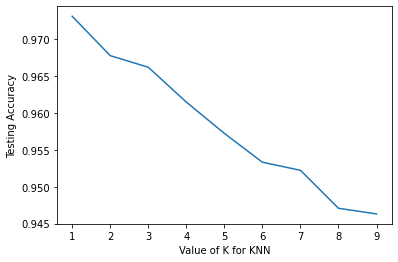

In [328]:
modelfit(x,y,'KNN')

`max_depth = 10` is the ideal max_depth parameter when using a Random Forest Classifier

In [184]:
def plot_LC(estimator , x,y, scoring):
    train_sizes, train_scores, test_scores = learning_curve(
    estimator=estimator,
    X=x,
    y=y,
    cv=5,
    scoring=scoring,
    train_sizes = [0.2,0.4,0.6,0.8,1]
    )
    
    if scoring == 'accuracy':
        
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)

        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        plt.subplots(1, figsize=(10,10))
        plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
        plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

        plt.title("Learning Curve")
        plt.xlabel("Training Set Size"), plt.ylabel(scoring+" Score"), plt.legend(loc="best")
        plt.tight_layout()
        plt.show()
        
    elif scoring == 'neg_root_mean_squared_error':
        train_mean = -train_scores.mean(axis=1)
        train_std = -train_scores.std(axis=1)

        test_mean = -test_scores.mean(axis=1)
        test_std = -test_scores.std (axis=1)

        plt.subplots(figsize=(10,8))
        plt.plot(train_sizes, train_mean, label="train")
        plt.plot(train_sizes, test_mean, label="validation")

        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

        plt.title("Learning Curve")
        plt.xlabel("Training Set Size")
        plt.ylabel("Error")
        plt.legend(loc="best")

        plt.show()